# Introduction
Houston is the most populous city in the U.S. state of Texas, fourth-most populous city in the United States, most populous city in the Southern United States, as well as the sixth-most populous in North America, with an estimated 2019 population of 2,320,268. Houston's demographics show that it is a large and ethnically diverse city. An estimated 600,000 illegal immigrants resided in the Houston area in 2017,comprising nearly 9% of the city's metropolitan population.

This final project explores the best locations for seafood restaurants throughout the city of Houston. The seafood diet is based on the principle of health and longevity. Seafood is not only tasteful and mouth-watering but also offers various health benefits. Now when the idea of a healthy lifestyle conquered the minds of people all over the country, seafood restaurants became extremely popular, as they offer a healthy alternative to regular American eating habits. That's why potentially the owner of the new East European restaurant can have great success and consistent profit. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So my project will attempt to answer the questions “Where should the investor open a seafood restaurant?” and “Where should I go If I want great seafood?”

# Data
In order to answer the above questions, data on Houston neighborhoods, districts to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

Houston data containing the neighborhoods and districts, latitudes, and longitudes will be obtained from the data source: https://www.kaggle.com/mrchristolpher/houston-texas-neighborhoods-lat-long-list

All data related to locations and quality of seafood restaurants will be obtained via the Foursquare API utilized via the Request library in Python.

# Methodology
• Data will be collected from https://www.kaggle.com/mrchristolpher/houston-texas-neighborhoods-lat-long-list and cleaned and processed into a dataframe.

• Foursquare be used to locate all venues and then filtered by seafood restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on ratings.

• Finally, the data be will be visually assessed using graphing from Python libraries.

# Problem Statement
What is / are the best location(s) for seafood cuisine in Houston?
In what Neighborhood and/or district should the investor open a seafood restaurant to have the best chance of being successful?
Where would I go in Houston to have the best seafood?

## Step-1: importing all required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112 kB 3.4 MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ----------

## Step-2: Downloading andpreparing the dataset

In [3]:
Houston_data = pd.read_csv('Houston_Texas_Neighborhoods_Lat_Long_List.csv')
print (Houston_data.shape)
Houston_data.head()

(88, 7)


,Neighborhood,District,City,State,Latitude,Longitude,Full Address
0,Acres Home,Northwest,Houston,Texas,29.870719,-95.436543,"Acres Home, Houston, Texas"
1,Addicks,West,Houston,Texas,29.813269,-95.645476,"Addicks, Houston, Texas"
2,Afton Oaks,West,Houston,Texas,29.736854,-95.453248,"Afton Oaks, Houston, Texas"
3,Alief,Southwest,Houston,Texas,29.682720,-95.593239,"Alief, Houston, Texas"
4,Astrodome Area,South,Houston,Texas,29.685208,-95.403226,"Astrodome Area, Houston, Texas"


In [4]:
Houston_data= Houston_data.loc[:,['District','Neighborhood', 'Latitude', 'Longitude']]
print (Houston_data.shape)
Houston_data.head()

(88, 4)


,District,Neighborhood,Latitude,Longitude
0,Northwest,Acres Home,29.870719,-95.436543
1,West,Addicks,29.813269,-95.645476
2,West,Afton Oaks,29.736854,-95.453248
3,Southwest,Alief,29.682720,-95.593239
4,South,Astrodome Area,29.685208,-95.403226


In [5]:
address = 'Houston, TX'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston are 29.7589382, -95.3676974.


In [6]:
# create map of Houston using latitude and longitude values
map_houston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Houston_data['Latitude'], Houston_data['Longitude'], Houston_data['District'], Houston_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston

## Step-3: Defining Foursquare Credentials and Version

In [7]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'FJEJPRUVB2SXOYXXYLJNMKFYRUPEUBCOW0QPYVLLOSTM42JT' # your Foursquare ID
CLIENT_SECRET = 'LL0YRJOPILRZ2T1KV51UEA2XBHQCQBLQNJHLMNZOY2LYG3IT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

## Step-4: Defining the required functions

In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [9]:
def get_venues(lat,lng):
    #set variables
    radius=10000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [10]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Step-5: Finding Seafood restaurant's locations in each neighborhood

In [17]:
# prepare neighborhood list that contains seafood restaurants
column_names=['District', 'Neighborhood', 'ID','Name']
seafood_rest_hu=pd.DataFrame(columns=column_names)
count=1
for row in Houston_data.values.tolist():
    District, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    seafood_restaurants=venues[venues['Category']=='Seafood Restaurant']   
    print('(',count,'/',len(Houston_data),')','Seafood Restaurants in '+Neighborhood+', '+District+':'+str(len(seafood_restaurants)))
    print(row)
    for resturant_detail in seafood_restaurants.values.tolist():
        id, name , category=resturant_detail
        seafood_rest_hu = seafood_rest_hu.append({'District': District,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 88 ) Seafood Restaurants in Acres Home, Northwest:6
['Northwest', 'Acres Home', 29.870719, -95.436543]
( 2 / 88 ) Seafood Restaurants in Addicks, West:2
['West', 'Addicks', 29.8132687, -95.64547590000001]
( 3 / 88 ) Seafood Restaurants in Afton Oaks, West:3
['West', 'Afton Oaks', 29.7368538, -95.4532482]
( 4 / 88 ) Seafood Restaurants in Alief, Southwest:2
['Southwest', 'Alief', 29.682720399999997, -95.593239]
( 5 / 88 ) Seafood Restaurants in Astrodome Area, South:3
['South', 'Astrodome Area', 29.6852077, -95.4032257]
( 6 / 88 ) Seafood Restaurants in Braeburn, Southwest:1
['Southwest', 'Braeburn', 29.6768908, -95.5283682]
( 7 / 88 ) Seafood Restaurants in Braeswood, Southwest:3
['Southwest', 'Braeswood', 29.689657699999998, -95.4400613]
( 8 / 88 ) Seafood Restaurants in Brays Oaks , Southwest:1
['Southwest', 'Brays Oaks ', 29.655711199999995, -95.5280193]
( 9 / 88 ) Seafood Restaurants in Briar Forest, West:5
['West', 'Briar Forest', 29.747835, -95.5872933]
( 10 / 88 ) Seafood 

( 71 / 88 ) Seafood Restaurants in South Acres, South:1
['South', 'South Acres', 29.627639600000002, -95.3556233]
( 72 / 88 ) Seafood Restaurants in South Belt, Southeast:0
['Southeast', 'South Belt', 29.6015354, -95.21606750000001]
( 73 / 88 ) Seafood Restaurants in South Main, South:4
['South', 'South Main', 29.6725728, -95.4201377]
( 74 / 88 ) Seafood Restaurants in South Park, South:1
['South', 'South Park', 29.666326799999997, -95.3372099]
( 75 / 88 ) Seafood Restaurants in Spring Branch Central, Northwest:6
['Northwest', 'Spring Branch Central', 29.811081199999997, -95.5095815]
( 76 / 88 ) Seafood Restaurants in Spring Branch East, Northwest:4
['Northwest', 'Spring Branch East', 29.7908472, -95.5446297]
( 77 / 88 ) Seafood Restaurants in Spring Branch North, Northwest:5
['Northwest', 'Spring Branch North', 29.822703399999998, -95.5452559]
( 78 / 88 ) Seafood Restaurants in Spring Branch West, West:4
['West', 'Spring Branch West', 29.7908472, -95.5446297]
( 79 / 88 ) Seafood Resta

## Step-6: Neighborhood-related data Exploratory

In [18]:
#Save the information to a .csv file due to limited calls on FourSquare
seafood_rest_hu.to_csv('seafood_rest_hu.csv', index = False)

In [11]:
# Read the seafood resturants data (totally 69 seafood resturants)
seafood_rest_hu = pd.read_csv('seafood_rest_hu.csv')
print(seafood_rest_hu.shape)
seafood_rest_hu.head()

(215, 4)


,District,Neighborhood,ID,Name
0,Northwest,Acres Home,4bd7a32e09ecb713886a477c,Mambo Seafood
1,Northwest,Acres Home,4c3f8c84ce54e21e5438081a,Pappadeaux Seafood Kitchen
2,Northwest,Acres Home,4c96456a58d4b60c667d3929,Captain Benny's Seafood
3,Northwest,Acres Home,4b915dd0f964a520a9b633e3,Pappas Seafood House
4,Northwest,Acres Home,4b91ca29f964a5209ad733e3,Mambo Seafood


In [12]:
# Search for unique seafood resturants number and name
print('Number of unique seafood resturants in Houston :', seafood_rest_hu.Name.nunique())
seafood_rest_hu.Name.value_counts()

Number of unique seafood resturants in Houston : 32


Pappadeaux Seafood Kitchen              41
Mambo Seafood                           24
Goode Company Seafood                   22
Eddie V's Prime Seafood                 22
Captain Benny's Seafood                 10
McCormick & Schmick's                    9
TP Seafood Restaurant And Market         9
Pappas Seafood House                     8
Eunice                                   7
Texas Grill Seafood                      7
Truluck's                                7
Liberty Kitchen & Oyster Bar             7
Culichi Town                             6
Casian Crawfish                          5
Lotus Seafood                            5
Captain Tom's Seafood and Oyster Bar     4
Connie's Seafood Market & Restaurant     3
Captain Tom's                            3
Ostioneria Michoacan                     2
Lotus Seafood Market                     2
Cajun Fuze                               1
Capitan Seafood Kitchen                  1
Baytown Seafood                          1
Babin's Sea

In [14]:
df1=Houston_data.groupby('District')['Neighborhood'].count().to_frame()
df2=seafood_rest_hu.groupby('District')['ID'].count().to_frame()
df3=pd.concat([df1, df2], axis=1).fillna(0).astype(int)
df3.columns=['No.Neighborhood', 'No.Seafood Resturants']
df3

,No.Neighborhood,No.Seafood Resturants
Downtown,1,0
East,6,14
North,6,28
Northeast,11,31
Northwest,12,46
South,11,18
Southeast,14,13
Southwest,15,29
West,12,36


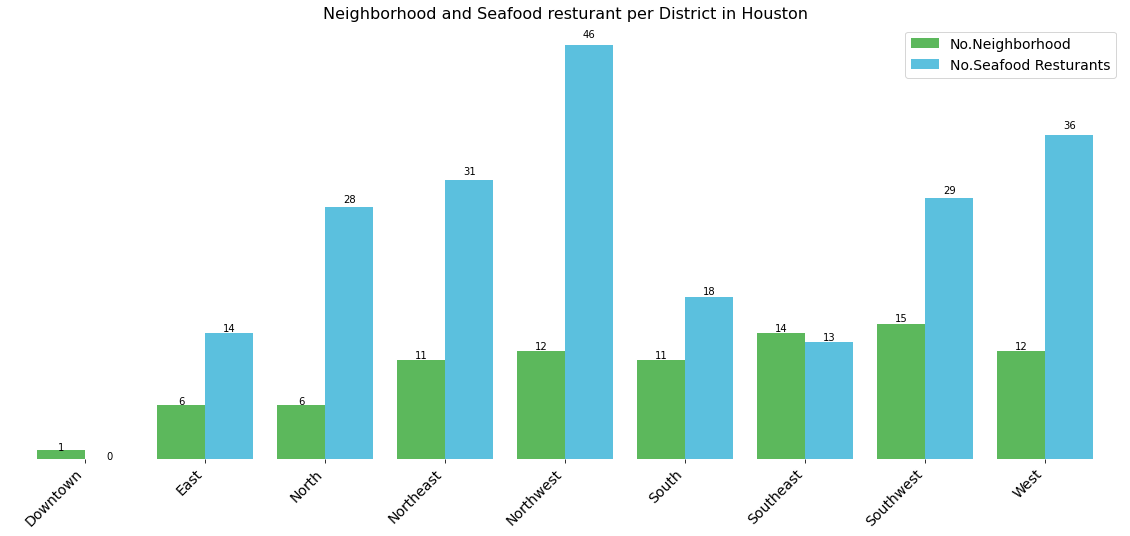

In [17]:
ax = df3.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)

ax.set_title("Neighborhood and Seafood resturant per District in Houston", fontsize=16)
ax.legend(labels=df3.columns, fontsize=14)
plt.xticks(fontsize=14, rotation=45, ha='right')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height*1.02), ha='center')
    

    
plt.show()

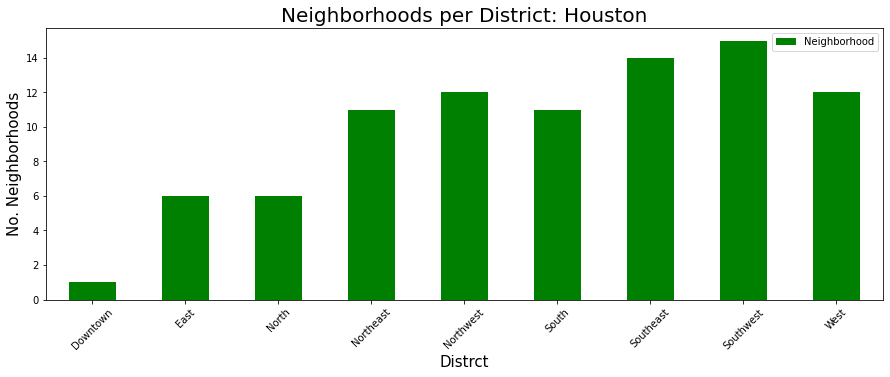

In [31]:
# Neighborhood distribution in different districts of Houston
Houston_data.groupby('District')['Neighborhood'].count().plot.bar(figsize=(15,5), color='g')
plt.title('Neighborhoods per District: Houston', fontsize = 20)
plt.xlabel('Distrct', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation =45)
plt.legend()
plt.show()



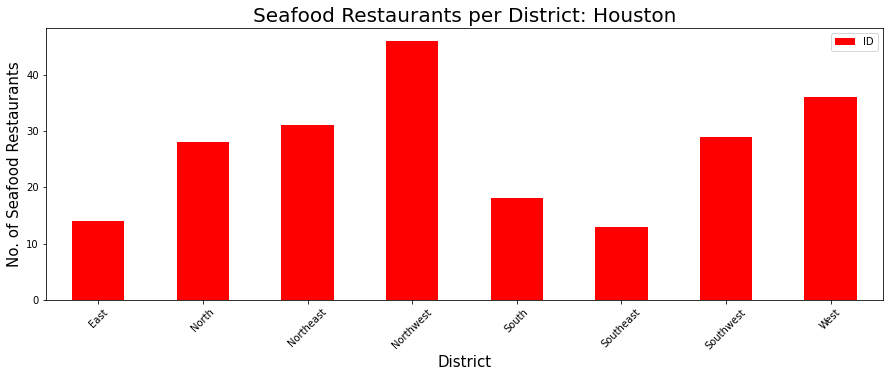

In [32]:
# Seafood resturants distribution in different districts of Houston
seafood_rest_hu.groupby('District')['ID'].count().plot.bar(figsize=(15,5), color='r')
plt.title('Seafood Restaurants per District: Houston', fontsize = 20)
plt.xlabel('District', fontsize = 15)
plt.ylabel('No. of Seafood Restaurants', fontsize=15)
plt.xticks(rotation =45)
plt.legend()
plt.show()

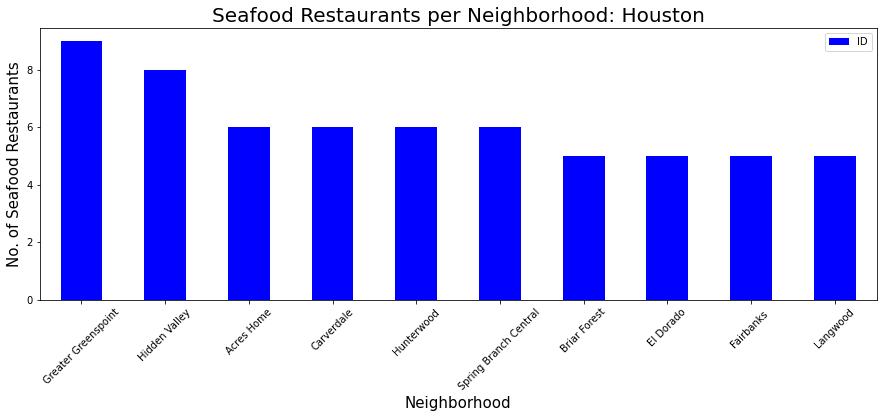

In [33]:
Neighbor_No = 10 # top number for graphing all the same past 10
seafood_rest_hu.groupby('Neighborhood')['ID'].count().nlargest(Neighbor_No).plot.bar(figsize=(15,5), color='b')
plt.title('Seafood Restaurants per Neighborhood: Houston', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Seafood Restaurants', fontsize=15)
plt.xticks(rotation =45)
plt.legend()
plt.show()

## Step-7: Get the info of all restaurants from Foursquare

In [24]:
column_names=['District','Neighborhood','ID','Name','Likes','Rating','Tips']
seafood_rest_stats_hu=pd.DataFrame(columns=column_names)
count=1
for row in seafood_rest_hu.values.tolist():
    District,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(seafood_rest_hu),')','processed')
    seafood_rest_stats_hu = seafood_rest_stats_hu.append({'District': District,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
seafood_rest_stats_hu.head()

{'meta': {'code': 200, 'requestId': '603b2d3f474da31928842a74'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

{'meta': {'code': 200, 'requestId': '603b2d4028852e14aaabb4be'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d407d0121680cf9ec5a'}, 'response': {'venue': {'id': '4b915dd0f964a520a9b633e3', 'name': 'Pappas Seafood House', 'contact': {'phone': '2819999928', 'formattedPhone': '(281) 999-9928', 'facebook': '277102715825213', 'facebookUsername': 'PappasSeafoodGreenspoint', 'facebookName': 'Pappas Seafood House'}, 'location': {'address': '11301 I-45 N.', 'crossStreet': 'at Aldine Bender Rd.', 'lat': 29.9296088, 'lng': -95.41293789999999, 'labeledLatLngs': [{'label': 'display', 'lat': 29.9296088, 'lng': -95.41293789999999}, {'label': 'entrance', 'lat': 29.929615, 'lng': -95.412743}], 'postalCode': '77037', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11301 I-45 N. (at Aldine Bender Rd.)', 'Houston, TX 77037', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappas-seafood-house/4b915dd0f964a520a9b633e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName':

{'meta': {'code': 200, 'requestId': '603b2d403f9e6d7e0a84565c'}, 'response': {'venue': {'id': '4b91ca29f964a5209ad733e3', 'name': 'Mambo Seafood', 'contact': {'phone': '2818203300', 'formattedPhone': '(281) 820-3300', 'twitter': 'mamboseafood', 'facebook': '107898102608413', 'facebookUsername': 'MamboSeafood03', 'facebookName': 'Mambo Seafood (45N & West Rd)'}, 'location': {'address': '10810 North Fwy', 'lat': 29.922079, 'lng': -95.411518, 'labeledLatLngs': [{'label': 'display', 'lat': 29.922079, 'lng': -95.411518}], 'postalCode': '77037', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10810 North Fwy', 'Houston, TX 77037', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4b91ca29f964a5209ad733e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', '

{'meta': {'code': 200, 'requestId': '603b2d409c4e7a2d1251d231'}, 'response': {'venue': {'id': '5865a75365e7c70a2ff0aca4', 'name': 'Culichi Town', 'contact': {}, 'location': {'address': '11901 Aldine Westfield Rd', 'lat': 29.885234, 'lng': -95.355239, 'labeledLatLngs': [{'label': 'display', 'lat': 29.885234, 'lng': -95.355239}], 'postalCode': '77093', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11901 Aldine Westfield Rd', 'Houston, TX 77093', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/culichi-town/5865a75365e7c70a2ff0aca4', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 9, 'groups': [{'type

{'meta': {'code': 200, 'requestId': '603b2d41c37b916f9476c30f'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d414a1f991192f66803'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d42a6f02c11e214a788'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d428fda8b5552bc897b'}, 'response': {'venue': {'id': '4cb8dc81bac937042062e07c', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '7138741800', 'formattedPhone': '(713) 874-1800', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '2800 Kirby Dr Ste A100', 'lat': 29.740478295082397, 'lng': -95.41911633621102, 'labeledLatLngs': [{'label': 'display', 'lat': 29.740478295082397, 'lng': -95.41911633621102}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2800 Kirby Dr Ste A100', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4cb8dc81bac937042062e07c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '603b2d427e25c272023dbd94'}, 'response': {'venue': {'id': '4b11b5faf964a520e28223e3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '2814971110', 'formattedPhone': '(281) 497-1110', 'twitter': 'pappadeaux', 'facebook': '304986526339716', 'facebookUsername': 'PappadeauxRoyalOaks', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12109 Westheimer Rd', 'crossStreet': 'at W. Houston Ctr.', 'lat': 29.735814, 'lng': -95.594342, 'labeledLatLngs': [{'label': 'display', 'lat': 29.735814, 'lng': -95.594342}], 'postalCode': '77077', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12109 Westheimer Rd (at W. Houston Ctr.)', 'Houston, TX 77077', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b11b5faf964a520e28223e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortNa

{'meta': {'code': 200, 'requestId': '603b2d424a1f991192f669ac'}, 'response': {'venue': {'id': '55e642fc498eba4e15fdb3f2', 'name': 'Lotus Seafood', 'contact': {}, 'location': {'address': '2835 Kirkwood', 'crossStreet': 'Richmond', 'lat': 29.732347240219315, 'lng': -95.58896589650968, 'labeledLatLngs': [{'label': 'display', 'lat': 29.732347240219315, 'lng': -95.58896589650968}], 'cc': 'US', 'neighborhood': 'Westchase', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2835 Kirkwood (Richmond)', 'Houston, TX', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-seafood/55e642fc498eba4e15fdb3f2', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 3, 'message': 'Expensive', 'curren

{'meta': {'code': 200, 'requestId': '603b2d431c6d5c00ef0f1776'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d432c29921ef35ef970'}, 'response': {'venue': {'id': '4cb8dc81bac937042062e07c', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '7138741800', 'formattedPhone': '(713) 874-1800', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '2800 Kirby Dr Ste A100', 'lat': 29.740478295082397, 'lng': -95.41911633621102, 'labeledLatLngs': [{'label': 'display', 'lat': 29.740478295082397, 'lng': -95.41911633621102}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2800 Kirby Dr Ste A100', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4cb8dc81bac937042062e07c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '603b2d4328852e14aaabbb80'}, 'response': {'venue': {'id': '4b21a7b0f964a520a43f24e3', 'name': 'Mambo Seafood', 'contact': {'phone': '7135413666', 'formattedPhone': '(713) 541-3666', 'twitter': 'mamboseafood', 'facebook': '678015385606909', 'facebookUsername': 'MamboSeafood01', 'facebookName': 'Mambo Seafood (Hillcroft & Bellaire)'}, 'location': {'address': '6697 Hillcroft St', 'lat': 29.707651, 'lng': -95.492594, 'labeledLatLngs': [{'label': 'display', 'lat': 29.707651, 'lng': -95.492594}], 'postalCode': '77081', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6697 Hillcroft St', 'Houston, TX 77081', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4b21a7b0f964a520a43f24e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/s

{'meta': {'code': 200, 'requestId': '603b2d43d226252cc3da1282'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d4400fb1406d26eae7b'}, 'response': {'venue': {'id': '5babc856838e59002c0a8c8a', 'name': 'Eunice', 'contact': {'phone': '8324911717', 'formattedPhone': '(832) 491-1717'}, 'location': {'address': '3737 Buffalo Speedway', 'crossStreet': 'Richmond Avenue', 'lat': 29.732910029585025, 'lng': -95.42864778022694, 'labeledLatLngs': [{'label': 'display', 'lat': 29.732910029585025, 'lng': -95.42864778022694}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3737 Buffalo Speedway (Richmond Avenue)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eunice/5babc856838e59002c0a8c8a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

( 21 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d44474da31928843416'}, 'response': {'venue': {'id': '4b11b5faf964a520e28223e3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '2814971110', 'formattedPhone': '(281) 497-1110', 'twitter': 'pappadeaux', 'facebook': '304986526339716', 'facebookUsername': 'PappadeauxRoyalOaks', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12109 Westheimer Rd', 'crossStreet': 'at W. Houston Ctr.', 'lat': 29.735814, 'lng': -95.594342, 'labeledLatLngs': [{'label': 'display', 'lat': 29.735814, 'lng': -95.594342}], 'postalCode': '77077', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12109 Westheimer Rd (at W. Houston Ctr.)', 'Houston, TX 77077', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b11b5faf964a520e28223e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood

{'meta': {'code': 200, 'requestId': '603b2d45c93ebf4f0d39cba8'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d451b89d42994a1b760'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d451b89d42994a1b7c5'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d46947ccc6176039415'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d464a1f991192f6700e'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d469f7b3248b3fb9153'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

                         ID                   Name  Likes  Rating  Tips
0  4aa33694f964a520b44320e3  Goode Company Seafood    103     8.5    32
( 30 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d47939c25236914d3c4'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United St

                         ID                     Name  Likes  Rating  Tips
0  4c96456a58d4b60c667d3929  Captain Benny's Seafood     28     8.6    16
( 32 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d47ff5f9a25f4c57bfc'}, 'response': {'venue': {'id': '4c96456a58d4b60c667d3929', 'name': "Captain Benny's Seafood", 'contact': {}, 'location': {'address': '10896 Northwest Fwy', 'lat': 29.816944022689345, 'lng': -95.46487345204822, 'labeledLatLngs': [{'label': 'display', 'lat': 29.816944022689345, 'lng': -95.46487345204822}], 'postalCode': '77092', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10896 Northwest Fwy', 'Houston, TX 77092', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-bennys-seafood/4c96456a58d4b60c667d3929', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/c

{'meta': {'code': 200, 'requestId': '603b2d4840892a376ddf720f'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d48808c012153fc4f68'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

{'meta': {'code': 200, 'requestId': '603b2d48720e822692a784be'}, 'response': {'venue': {'id': '4b8810baf964a520fadc31e3', 'name': 'J&J Seafood', 'contact': {'phone': '7136616102', 'formattedPhone': '(713) 661-6102'}, 'location': {'address': '3825 Woodvalley Dr', 'lat': 29.679970915118687, 'lng': -95.43923958927482, 'labeledLatLngs': [{'label': 'display', 'lat': 29.679970915118687, 'lng': -95.43923958927482}, {'label': 'entrance', 'lat': 29.680002, 'lng': -95.43922}], 'postalCode': '77025', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3825 Woodvalley Dr', 'Houston, TX 77025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jj-seafood/4b8810baf964a520fadc31e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': Fa

{'meta': {'code': 200, 'requestId': '603b2d49fea1e97dce4ae82f'}, 'response': {'venue': {'id': '53bb3557498e551fced0aad0', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7138604001', 'formattedPhone': '(713) 860-4001', 'facebook': '829878260380481', 'facebookUsername': 'PappadeauxEast', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12420 East Fwy', 'lat': 29.7693896, 'lng': -95.2176146, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7693896, 'lng': -95.2176146}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12420 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/53bb3557498e551fced0aad0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'su

{'meta': {'code': 200, 'requestId': '603b2d49fea1e97dce4ae935'}, 'response': {'venue': {'id': '4ef2233482310969a7db7c41', 'name': 'Texas Grill Seafood', 'contact': {}, 'location': {'lat': 29.774697999999997, 'lng': -95.248851, 'labeledLatLngs': [{'label': 'display', 'lat': 29.774697999999997, 'lng': -95.248851}], 'postalCode': '77013', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Houston, TX 77013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/texas-grill-seafood/4ef2233482310969a7db7c41', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'others', 'count': 7, 'items': [{'

{'meta': {'code': 200, 'requestId': '603b2d4a40892a376ddf7602'}, 'response': {'venue': {'id': '53bb3557498e551fced0aad0', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7138604001', 'formattedPhone': '(713) 860-4001', 'facebook': '829878260380481', 'facebookUsername': 'PappadeauxEast', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12420 East Fwy', 'lat': 29.7693896, 'lng': -95.2176146, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7693896, 'lng': -95.2176146}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12420 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/53bb3557498e551fced0aad0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'su

{'meta': {'code': 200, 'requestId': '603b2d4a94ac1d4749c5d4d6'}, 'response': {'venue': {'id': '4ef2233482310969a7db7c41', 'name': 'Texas Grill Seafood', 'contact': {}, 'location': {'lat': 29.774697999999997, 'lng': -95.248851, 'labeledLatLngs': [{'label': 'display', 'lat': 29.774697999999997, 'lng': -95.248851}], 'postalCode': '77013', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Houston, TX 77013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/texas-grill-seafood/4ef2233482310969a7db7c41', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'others', 'count': 7, 'items': [{'

{'meta': {'code': 200, 'requestId': '603b2d4b40892a376ddf775b'}, 'response': {'venue': {'id': '5865a75365e7c70a2ff0aca4', 'name': 'Culichi Town', 'contact': {}, 'location': {'address': '11901 Aldine Westfield Rd', 'lat': 29.885234, 'lng': -95.355239, 'labeledLatLngs': [{'label': 'display', 'lat': 29.885234, 'lng': -95.355239}], 'postalCode': '77093', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11901 Aldine Westfield Rd', 'Houston, TX 77093', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/culichi-town/5865a75365e7c70a2ff0aca4', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 9, 'groups': [{'type

{'meta': {'code': 200, 'requestId': '603b2d4bc93ebf4f0d39d6d7'}, 'response': {'venue': {'id': '4cab5b3d2776b60ca8674b0d', 'name': 'Mambo Seafood', 'contact': {'phone': '7136370553', 'formattedPhone': '(713) 637-0553', 'twitter': 'mamboseafood', 'facebook': '150290401665316', 'facebookUsername': 'MamboSeafood07', 'facebookName': 'Mambo Seafood (I-10 & Federal)'}, 'location': {'address': '12333 East Fwy', 'lat': 29.771058, 'lng': -95.2194249, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771058, 'lng': -95.2194249}, {'label': 'entrance', 'lat': 29.771125, 'lng': -95.219276}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12333 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4cab5b3d2776b60ca8674b0d', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefi

{'meta': {'code': 200, 'requestId': '603b2d4c347ded6511525214'}, 'response': {'venue': {'id': '4c6cde2cd68a9c745aef6b6b', 'name': "Captain Tom's Seafood and Oyster Bar", 'contact': {'phone': '7134513700', 'formattedPhone': '(713) 451-3700'}, 'location': {'address': '13955 East Fwy', 'crossStreet': 'Normandy', 'lat': 29.771279999999997, 'lng': -95.176101, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771279999999997, 'lng': -95.176101}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13955 East Fwy (Normandy)', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-toms-seafood-and-oyster-bar/4c6cde2cd68a9c745aef6b6b', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified

{'meta': {'code': 200, 'requestId': '603b2d4c1c6d5c00ef0f289c'}, 'response': {'venue': {'id': '4b11b5faf964a520e28223e3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '2814971110', 'formattedPhone': '(281) 497-1110', 'twitter': 'pappadeaux', 'facebook': '304986526339716', 'facebookUsername': 'PappadeauxRoyalOaks', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12109 Westheimer Rd', 'crossStreet': 'at W. Houston Ctr.', 'lat': 29.735814, 'lng': -95.594342, 'labeledLatLngs': [{'label': 'display', 'lat': 29.735814, 'lng': -95.594342}], 'postalCode': '77077', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12109 Westheimer Rd (at W. Houston Ctr.)', 'Houston, TX 77077', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b11b5faf964a520e28223e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortNa

{'meta': {'code': 200, 'requestId': '603b2d4c8f32c40810b9a993'}, 'response': {'venue': {'id': '4b5f76aff964a520dfbb29e3', 'name': 'Rockfish Seafood Grill', 'contact': {'phone': '2815872900', 'formattedPhone': '(281) 587-2900', 'twitter': 'rockfishseafood'}, 'location': {'address': '11805 Westheimer Rd', 'lat': 29.736145020503397, 'lng': -95.58587536782358, 'labeledLatLngs': [{'label': 'display', 'lat': 29.736145020503397, 'lng': -95.58587536782358}], 'postalCode': '77077', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11805 Westheimer Rd', 'Houston, TX 77077', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rockfish-seafood-grill/4b5f76aff964a520dfbb29e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False,

{'meta': {'code': 200, 'requestId': '603b2d4d3f9e6d7e0a846d40'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d4db9a1cf0a87c085bd'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d4e2c29921ef35f0d50'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d4e6f8cdb75ef187198'}, 'response': {'venue': {'id': '4c74649cff1fb60c4c85f3a7', 'name': 'Lotus Seafood Market', 'contact': {'phone': '7132707987', 'formattedPhone': '(713) 270-7987'}, 'location': {'address': '8550 S Braeswood Blvd', 'crossStreet': 'S Gessner Dr', 'lat': 29.671547741941513, 'lng': -95.52748736288545, 'labeledLatLngs': [{'label': 'display', 'lat': 29.671547741941513, 'lng': -95.52748736288545}], 'postalCode': '77071', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['8550 S Braeswood Blvd (S Gessner Dr)', 'Houston, TX 77071', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-seafood-market/4c74649cff1fb60c4c85f3a7', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}, {'i

{'meta': {'code': 200, 'requestId': '603b2d4fff5f9a25f4c58951'}, 'response': {'venue': {'id': '4bb665e0941ad13af95c1fe3', 'name': 'Pier 36 Seafood & Oyster Bar', 'contact': {'phone': '2812384800', 'formattedPhone': '(281) 238-4800'}, 'location': {'address': '1410 E Highway 90A', 'crossStreet': 'FM 359', 'lat': 29.595066614913183, 'lng': -95.73911312238153, 'labeledLatLngs': [{'label': 'display', 'lat': 29.595066614913183, 'lng': -95.73911312238153}], 'postalCode': '77406', 'cc': 'US', 'city': 'Richmond', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1410 E Highway 90A (FM 359)', 'Richmond, TX 77406', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pier-36-seafood--oyster-bar/4bb665e0941ad13af95c1fe3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 've

{'meta': {'code': 200, 'requestId': '603b2d4f51ca0668fe152396'}, 'response': {'venue': {'id': '594d71902be42528bc8d0e46', 'name': 'Casian Crawfish', 'contact': {'phone': '7133607610', 'formattedPhone': '(713) 360-7610'}, 'location': {'address': '5314 Telephone Rd', 'crossStreet': 'Kinney Street', 'lat': 29.686620712280273, 'lng': -95.29768371582031, 'labeledLatLngs': [{'label': 'display', 'lat': 29.686620712280273, 'lng': -95.29768371582031}], 'postalCode': '77087', 'cc': 'US', 'neighborhood': 'Golfcrest', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5314 Telephone Rd (Kinney Street)', 'Houston, TX 77087', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/casian-crawfish/594d71902be42528bc8d0e46', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary

{'meta': {'code': 200, 'requestId': '603b2d50720e822692a791b7'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/liberty-kitchen--oyster-bar/4e7249a6b0fb9f3b35292560', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seaf

{'meta': {'code': 200, 'requestId': '603b2d508f32c40810b9af67'}, 'response': {'venue': {'id': '4b915dd0f964a520a9b633e3', 'name': 'Pappas Seafood House', 'contact': {'phone': '2819999928', 'formattedPhone': '(281) 999-9928', 'facebook': '277102715825213', 'facebookUsername': 'PappasSeafoodGreenspoint', 'facebookName': 'Pappas Seafood House'}, 'location': {'address': '11301 I-45 N.', 'crossStreet': 'at Aldine Bender Rd.', 'lat': 29.9296088, 'lng': -95.41293789999999, 'labeledLatLngs': [{'label': 'display', 'lat': 29.9296088, 'lng': -95.41293789999999}, {'label': 'entrance', 'lat': 29.929615, 'lng': -95.412743}], 'postalCode': '77037', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11301 I-45 N. (at Aldine Bender Rd.)', 'Houston, TX 77037', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappas-seafood-house/4b915dd0f964a520a9b633e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName':

{'meta': {'code': 200, 'requestId': '603b2d50d226252cc3da2930'}, 'response': {'venue': {'id': '4b678c2ff964a520c0542be3', 'name': "Captain Benny's", 'contact': {'phone': '2818762533', 'formattedPhone': '(281) 876-2533'}, 'location': {'address': '222 W Rankin Rd', 'crossStreet': 'at I-45', 'lat': 29.966255314332916, 'lng': -95.42219582765068, 'labeledLatLngs': [{'label': 'display', 'lat': 29.966255314332916, 'lng': -95.42219582765068}], 'postalCode': '77090', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['222 W Rankin Rd (at I-45)', 'Houston, TX 77090', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-bennys/4b678c2ff964a520c0542be3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCo

{'meta': {'code': 200, 'requestId': '603b2d518f32c40810b9b119'}, 'response': {'venue': {'id': '5311467d11d2358d539058a7', 'name': 'Lotus Seafood', 'contact': {'phone': '2814478881', 'formattedPhone': '(281) 447-8881'}, 'location': {'address': '10092 Veterans Memorial Dr Ste B', 'lat': 29.914218661271192, 'lng': -95.44087337587243, 'labeledLatLngs': [{'label': 'display', 'lat': 29.914218661271192, 'lng': -95.44087337587243}], 'postalCode': '77038', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10092 Veterans Memorial Dr Ste B', 'Houston, TX 77038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-seafood/5311467d11d2358d539058a7', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d10e951735', 'name'

{'meta': {'code': 200, 'requestId': '603b2d518f32c40810b9b1ca'}, 'response': {'venue': {'id': '4b5cd8c9f964a520134729e3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '2818217684', 'formattedPhone': '(281) 821-7684', 'twitter': 'pappadeaux', 'facebook': '133486205977', 'facebookUsername': 'PappadeauxSeafoodKitchen', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': 'Terminal E, near Gate E4', 'crossStreet': 'IAH Airport', 'lat': 29.98452753215045, 'lng': -95.33523445641289, 'labeledLatLngs': [{'label': 'display', 'lat': 29.98452753215045, 'lng': -95.33523445641289}], 'postalCode': '77032', 'cc': 'US', 'neighborhood': 'George Bush Intercontinental Airport', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Terminal E, near Gate E4 (IAH Airport)', 'Houston, TX 77032', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b5cd8c9f964a520134729e3', 'categories': [{'id': '4bf58dd8d48988d1

{'meta': {'code': 200, 'requestId': '603b2d519c4e7a2d1251f129'}, 'response': {'venue': {'id': '5005ed3ee4b02c90cb2e53ec', 'name': 'Capitan Seafood Kitchen', 'contact': {}, 'location': {'address': '12100 Veterans Memorial Dr', 'lat': 29.963487572611097, 'lng': -95.47954941867472, 'labeledLatLngs': [{'label': 'display', 'lat': 29.963487572611097, 'lng': -95.47954941867472}, {'label': 'entrance', 'lat': 29.962491, 'lng': -95.478095}], 'postalCode': '77067', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12100 Veterans Memorial Dr', 'Houston, TX 77067', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/capitan-seafood-kitchen/5005ed3ee4b02c90cb2e53ec', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {

{'meta': {'code': 200, 'requestId': '603b2d527a51cf4a2c9e3727'}, 'response': {'venue': {'id': '4ea862660aaf6e05866cde62', 'name': 'TP Seafood Restaurant And Market', 'contact': {'phone': '7137310301', 'formattedPhone': '(713) 731-0301'}, 'location': {'address': '3735 Reed Rd', 'crossStreet': 'Scott St', 'lat': 29.658452769125905, 'lng': -95.36814869314846, 'labeledLatLngs': [{'label': 'display', 'lat': 29.658452769125905, 'lng': -95.36814869314846}, {'label': 'entrance', 'lat': 29.658412, 'lng': -95.368284}], 'postalCode': '77051', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3735 Reed Rd (Scott St)', 'Houston, TX 77051', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tp-seafood-restaurant-and-market/4ea862660aaf6e05866cde62', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '603b2d527e25c272023dda52'}, 'response': {'venue': {'id': '4c96456a58d4b60c667d3929', 'name': "Captain Benny's Seafood", 'contact': {}, 'location': {'address': '10896 Northwest Fwy', 'lat': 29.816944022689345, 'lng': -95.46487345204822, 'labeledLatLngs': [{'label': 'display', 'lat': 29.816944022689345, 'lng': -95.46487345204822}], 'postalCode': '77092', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10896 Northwest Fwy', 'Houston, TX 77092', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-bennys-seafood/4c96456a58d4b60c667d3929', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 16}, 'url': 'http://captbennys.com', 'price': {'tier': 1, 'mess

                         ID                  Name  Likes  Rating  Tips
0  4b915dd0f964a520a9b633e3  Pappas Seafood House    125     8.7    28
( 80 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d5228852e14aaabd6e8'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursq

{'meta': {'code': 200, 'requestId': '603b2d5362b05167a3ede8c4'}, 'response': {'venue': {'id': '4ea862660aaf6e05866cde62', 'name': 'TP Seafood Restaurant And Market', 'contact': {'phone': '7137310301', 'formattedPhone': '(713) 731-0301'}, 'location': {'address': '3735 Reed Rd', 'crossStreet': 'Scott St', 'lat': 29.658452769125905, 'lng': -95.36814869314846, 'labeledLatLngs': [{'label': 'display', 'lat': 29.658452769125905, 'lng': -95.36814869314846}, {'label': 'entrance', 'lat': 29.658412, 'lng': -95.368284}], 'postalCode': '77051', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3735 Reed Rd (Scott St)', 'Houston, TX 77051', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tp-seafood-restaurant-and-market/4ea862660aaf6e05866cde62', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '603b2d53fea1e97dce4afa76'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d5340892a376ddf86ef'}, 'response': {'venue': {'id': '4cb8dc81bac937042062e07c', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '7138741800', 'formattedPhone': '(713) 874-1800', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '2800 Kirby Dr Ste A100', 'lat': 29.740478295082397, 'lng': -95.41911633621102, 'labeledLatLngs': [{'label': 'display', 'lat': 29.740478295082397, 'lng': -95.41911633621102}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2800 Kirby Dr Ste A100', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4cb8dc81bac937042062e07c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '603b2d534253cd5b56737089'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d5450c1fe01f325353b'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d54b94d86186e53b563'}, 'response': {'venue': {'id': '4cb8dc81bac937042062e07c', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '7138741800', 'formattedPhone': '(713) 874-1800', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '2800 Kirby Dr Ste A100', 'lat': 29.740478295082397, 'lng': -95.41911633621102, 'labeledLatLngs': [{'label': 'display', 'lat': 29.740478295082397, 'lng': -95.41911633621102}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2800 Kirby Dr Ste A100', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4cb8dc81bac937042062e07c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '603b2d552c29921ef35f18f7'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d551c6d5c00ef0f3819'}, 'response': {'venue': {'id': '5babc856838e59002c0a8c8a', 'name': 'Eunice', 'contact': {'phone': '8324911717', 'formattedPhone': '(832) 491-1717'}, 'location': {'address': '3737 Buffalo Speedway', 'crossStreet': 'Richmond Avenue', 'lat': 29.732910029585025, 'lng': -95.42864778022694, 'labeledLatLngs': [{'label': 'display', 'lat': 29.732910029585025, 'lng': -95.42864778022694}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3737 Buffalo Speedway (Richmond Avenue)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eunice/5babc856838e59002c0a8c8a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '603b2d5551ca0668fe152ecc'}, 'response': {'venue': {'id': '4cab5b3d2776b60ca8674b0d', 'name': 'Mambo Seafood', 'contact': {'phone': '7136370553', 'formattedPhone': '(713) 637-0553', 'twitter': 'mamboseafood', 'facebook': '150290401665316', 'facebookUsername': 'MamboSeafood07', 'facebookName': 'Mambo Seafood (I-10 & Federal)'}, 'location': {'address': '12333 East Fwy', 'lat': 29.771058, 'lng': -95.2194249, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771058, 'lng': -95.2194249}, {'label': 'entrance', 'lat': 29.771125, 'lng': -95.219276}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12333 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4cab5b3d2776b60ca8674b0d', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefi

{'meta': {'code': 200, 'requestId': '603b2d567d0121680cfa13c2'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

{'meta': {'code': 200, 'requestId': '603b2d56116aee67fbdcc1a4'}, 'response': {'venue': {'id': '4b91ca29f964a5209ad733e3', 'name': 'Mambo Seafood', 'contact': {'phone': '2818203300', 'formattedPhone': '(281) 820-3300', 'twitter': 'mamboseafood', 'facebook': '107898102608413', 'facebookUsername': 'MamboSeafood03', 'facebookName': 'Mambo Seafood (45N & West Rd)'}, 'location': {'address': '10810 North Fwy', 'lat': 29.922079, 'lng': -95.411518, 'labeledLatLngs': [{'label': 'display', 'lat': 29.922079, 'lng': -95.411518}], 'postalCode': '77037', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10810 North Fwy', 'Houston, TX 77037', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4b91ca29f964a5209ad733e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', '

{'meta': {'code': 200, 'requestId': '603b2d5694ac1d4749c5ea20'}, 'response': {'venue': {'id': '5311467d11d2358d539058a7', 'name': 'Lotus Seafood', 'contact': {'phone': '2814478881', 'formattedPhone': '(281) 447-8881'}, 'location': {'address': '10092 Veterans Memorial Dr Ste B', 'lat': 29.914218661271192, 'lng': -95.44087337587243, 'labeledLatLngs': [{'label': 'display', 'lat': 29.914218661271192, 'lng': -95.44087337587243}], 'postalCode': '77038', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10092 Veterans Memorial Dr Ste B', 'Houston, TX 77038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-seafood/5311467d11d2358d539058a7', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d10e951735', 'name'

{'meta': {'code': 200, 'requestId': '603b2d5751ca0668fe153183'}, 'response': {'venue': {'id': '4bb68d73f562ef3bfe5e3097', 'name': 'Ostioneria Michoacan', 'contact': {'phone': '2819993995', 'formattedPhone': '(281) 999-3995'}, 'location': {'address': '11402 North Fwy', 'crossStreet': 'at Aldine Bender Rd.', 'lat': 29.932208814005026, 'lng': -95.41057024392899, 'labeledLatLngs': [{'label': 'display', 'lat': 29.932208814005026, 'lng': -95.41057024392899}], 'postalCode': '77060', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11402 North Fwy (at Aldine Bender Rd.)', 'Houston, TX 77060', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ostioneria-michoacan/4bb68d73f562ef3bfe5e3097', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True},

{'meta': {'code': 200, 'requestId': '603b2d5700fb1406d26ed11c'}, 'response': {'venue': {'id': '4c6cde2cd68a9c745aef6b6b', 'name': "Captain Tom's Seafood and Oyster Bar", 'contact': {'phone': '7134513700', 'formattedPhone': '(713) 451-3700'}, 'location': {'address': '13955 East Fwy', 'crossStreet': 'Normandy', 'lat': 29.771279999999997, 'lng': -95.176101, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771279999999997, 'lng': -95.176101}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13955 East Fwy (Normandy)', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-toms-seafood-and-oyster-bar/4c6cde2cd68a9c745aef6b6b', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified

{'meta': {'code': 200, 'requestId': '603b2d58474da31928845692'}, 'response': {'venue': {'id': '4b6f6ac1f964a520b8ef2ce3', 'name': "Captain Tom's", 'contact': {}, 'location': {'address': '13955 East Fwy', 'crossStreet': 'Freeport', 'lat': 29.771283275505233, 'lng': -95.17623096949855, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771283275505233, 'lng': -95.17623096949855}, {'label': 'entrance', 'lat': 29.771271, 'lng': -95.176035}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13955 East Fwy (Freeport)', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-toms/4b6f6ac1f964a520b8ef2ce3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCou

{'meta': {'code': 200, 'requestId': '603b2d58ddf713033f610684'}, 'response': {'venue': {'id': '4b5cd8c9f964a520134729e3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '2818217684', 'formattedPhone': '(281) 821-7684', 'twitter': 'pappadeaux', 'facebook': '133486205977', 'facebookUsername': 'PappadeauxSeafoodKitchen', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': 'Terminal E, near Gate E4', 'crossStreet': 'IAH Airport', 'lat': 29.98452753215045, 'lng': -95.33523445641289, 'labeledLatLngs': [{'label': 'display', 'lat': 29.98452753215045, 'lng': -95.33523445641289}], 'postalCode': '77032', 'cc': 'US', 'neighborhood': 'George Bush Intercontinental Airport', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Terminal E, near Gate E4 (IAH Airport)', 'Houston, TX 77032', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b5cd8c9f964a520134729e3', 'categories': [{'id': '4bf58dd8d48988d1

{'meta': {'code': 200, 'requestId': '603b2d5950c1fe01f3253dc0'}, 'response': {'venue': {'id': '4b915dd0f964a520a9b633e3', 'name': 'Pappas Seafood House', 'contact': {'phone': '2819999928', 'formattedPhone': '(281) 999-9928', 'facebook': '277102715825213', 'facebookUsername': 'PappasSeafoodGreenspoint', 'facebookName': 'Pappas Seafood House'}, 'location': {'address': '11301 I-45 N.', 'crossStreet': 'at Aldine Bender Rd.', 'lat': 29.9296088, 'lng': -95.41293789999999, 'labeledLatLngs': [{'label': 'display', 'lat': 29.9296088, 'lng': -95.41293789999999}, {'label': 'entrance', 'lat': 29.929615, 'lng': -95.412743}], 'postalCode': '77037', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11301 I-45 N. (at Aldine Bender Rd.)', 'Houston, TX 77037', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappas-seafood-house/4b915dd0f964a520a9b633e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName':

{'meta': {'code': 200, 'requestId': '603b2d59ffd7ec47128985ee'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

{'meta': {'code': 200, 'requestId': '603b2d59347ded65115269e1'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/liberty-kitchen--oyster-bar/4e7249a6b0fb9f3b35292560', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seaf

{'meta': {'code': 200, 'requestId': '603b2d5afe56103e30ba04fb'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

                         ID          Name  Likes  Rating  Tips
0  5865a75365e7c70a2ff0aca4  Culichi Town      9     8.5     1
( 115 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d5a53127d09e66c43c7'}, 'response': {'venue': {'id': '4b3975a3f964a520d75c25e3', 'name': "Connie's Seafood Market & Restaurant", 'contact': {'phone': '7138682144', 'formattedPhone': '(713) 868-2144', 'facebook': '114000338628389', 'facebookUsername': 'ConniesSeafood1', 'facebookName': "Connie's Seafood Market & Restaurant"}, 'location': {'address': '2525 Airline Dr', 'lat': 29.810856655590673, 'lng': -95.3821946749658, 'labeledLatLngs': [{'label': 'display', 'lat': 29.810856655590673, 'lng': -95.3821946749658}], 'postalCode': '77009', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2525 Airline Dr', 'Houston, TX 77009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/connies-seafood-market--restaurant/4b3975a3f964a520d75c25e3', 'categorie

                         ID                                  Name  Likes  \
0  4b3975a3f964a520d75c25e3  Connie's Seafood Market & Restaurant     28   

   Rating  Tips  
0     7.9    21  
( 116 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d5a1c6d5c00ef0f4205'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'U

                         ID                          Name  Likes  Rating  Tips
0  4e7249a6b0fb9f3b35292560  Liberty Kitchen & Oyster Bar    253     8.6    75
( 117 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d5a93998a5fddbb87c0'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'United States']}, 'canonicalUrl'

                         ID                          Name  Likes  Rating  Tips
0  4e7249a6b0fb9f3b35292560  Liberty Kitchen & Oyster Bar    253     8.6    75
( 118 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d5bf0130a68fa8cbb63'}, 'response': {'venue': {'id': '4a8f3ba8f964a520731420e3', 'name': 'Pappas Seafood House', 'contact': {'phone': '2814467707', 'formattedPhone': '(281) 446-7707', 'facebook': '697055693706747', 'facebookUsername': 'PappaSeafoodHumble', 'facebookName': 'Pappas Seafood House'}, 'location': {'address': '20410 U.S. 59 North', 'crossStreet': 'btwn FM 1960 & Townsen', 'lat': 30.0109175, 'lng': -95.2642288, 'labeledLatLngs': [{'label': 'display', 'lat': 30.0109175, 'lng': -95.2642288}], 'postalCode': '77339', 'cc': 'US', 'city': 'Humble', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['20410 U.S. 59 North (btwn FM 1960 & Townsen)', 'Humble, TX 77339', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappas-seafood-house/4a8f

{'meta': {'code': 200, 'requestId': '603b2d5b1a62722185e9d759'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d5b7e25c272023dea68'}, 'response': {'venue': {'id': '4aa33694f964a520b44320e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7134647933', 'formattedPhone': '(713) 464-7933', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '10201 Katy Fwy #400', 'crossStreet': 'I-10', 'lat': 29.7833551, 'lng': -95.5480314, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.782798, 'lng': -95.548128}, {'label': 'display', 'lat': 29.7833551, 'lng': -95.5480314}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10201 Katy Fwy #400 (I-10)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4aa33694f964a520b44320e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shor

{'meta': {'code': 200, 'requestId': '603b2d5bb94d86186e53c252'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d5c808c012153fc720f'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d5c2c29921ef35f262b'}, 'response': {'venue': {'id': '53bb3557498e551fced0aad0', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7138604001', 'formattedPhone': '(713) 860-4001', 'facebook': '829878260380481', 'facebookUsername': 'PappadeauxEast', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12420 East Fwy', 'lat': 29.7693896, 'lng': -95.2176146, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7693896, 'lng': -95.2176146}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12420 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/53bb3557498e551fced0aad0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'su

{'meta': {'code': 200, 'requestId': '603b2d5cb9a1cf0a87c0a04a'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d5d5073af7dedf4f76a'}, 'response': {'venue': {'id': '5babc856838e59002c0a8c8a', 'name': 'Eunice', 'contact': {'phone': '8324911717', 'formattedPhone': '(832) 491-1717'}, 'location': {'address': '3737 Buffalo Speedway', 'crossStreet': 'Richmond Avenue', 'lat': 29.732910029585025, 'lng': -95.42864778022694, 'labeledLatLngs': [{'label': 'display', 'lat': 29.732910029585025, 'lng': -95.42864778022694}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3737 Buffalo Speedway (Richmond Avenue)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eunice/5babc856838e59002c0a8c8a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '603b2d5e25e7213f4c29a7a5'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d5e50c1fe01f325478c'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d5e347ded651152733e'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d5fd226252cc3da433f'}, 'response': {'venue': {'id': '4aa33694f964a520b44320e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7134647933', 'formattedPhone': '(713) 464-7933', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '10201 Katy Fwy #400', 'crossStreet': 'I-10', 'lat': 29.7833551, 'lng': -95.5480314, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.782798, 'lng': -95.548128}, {'label': 'display', 'lat': 29.7833551, 'lng': -95.5480314}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10201 Katy Fwy #400 (I-10)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4aa33694f964a520b44320e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shor

{'meta': {'code': 200, 'requestId': '603b2d5f43ee311983ea0499'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d5f51ca0668fe153fec'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d607e25c272023df229'}, 'response': {'venue': {'id': '4b6100acf964a5207f052ae3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137826310', 'formattedPhone': '(713) 782-6310', 'twitter': 'pappadeaux', 'facebook': '1556469807914403', 'facebookUsername': 'PappadeauxGalleria', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '6015 Westheimer Rd', 'crossStreet': 'at Greenridge Dr.', 'lat': 29.73705, 'lng': -95.48849, 'labeledLatLngs': [{'label': 'display', 'lat': 29.73705, 'lng': -95.48849}], 'postalCode': '77057', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6015 Westheimer Rd (at Greenridge Dr.)', 'Houston, TX 77057', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6100acf964a5207f052ae3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Se

{'meta': {'code': 200, 'requestId': '603b2d60a6f02c11e214dd85'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d60116aee67fbdcd429'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d614fdbb60cde1122d3'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d614fdbb60cde112394'}, 'response': {'venue': {'id': '4cab5b3d2776b60ca8674b0d', 'name': 'Mambo Seafood', 'contact': {'phone': '7136370553', 'formattedPhone': '(713) 637-0553', 'twitter': 'mamboseafood', 'facebook': '150290401665316', 'facebookUsername': 'MamboSeafood07', 'facebookName': 'Mambo Seafood (I-10 & Federal)'}, 'location': {'address': '12333 East Fwy', 'lat': 29.771058, 'lng': -95.2194249, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771058, 'lng': -95.2194249}, {'label': 'entrance', 'lat': 29.771125, 'lng': -95.219276}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12333 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4cab5b3d2776b60ca8674b0d', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefi

{'meta': {'code': 200, 'requestId': '603b2d61d2329e788ccc80a2'}, 'response': {'venue': {'id': '4c6cde2cd68a9c745aef6b6b', 'name': "Captain Tom's Seafood and Oyster Bar", 'contact': {'phone': '7134513700', 'formattedPhone': '(713) 451-3700'}, 'location': {'address': '13955 East Fwy', 'crossStreet': 'Normandy', 'lat': 29.771279999999997, 'lng': -95.176101, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771279999999997, 'lng': -95.176101}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13955 East Fwy (Normandy)', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-toms-seafood-and-oyster-bar/4c6cde2cd68a9c745aef6b6b', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified

{'meta': {'code': 200, 'requestId': '603b2d62808c012153fc7db0'}, 'response': {'venue': {'id': '4bd7a32e09ecb713886a477c', 'name': 'Mambo Seafood', 'contact': {'phone': '7136919700', 'formattedPhone': '(713) 691-9700', 'twitter': 'mamboseafood', 'facebook': '108229449218700', 'facebookUsername': 'MamboSeafood02', 'facebookName': 'Mambo Seafood (Airline & Tidwell)'}, 'location': {'address': '6101 Airline Dr', 'crossStreet': 'Tidwell', 'lat': 29.8541732, 'lng': -95.3849985, 'labeledLatLngs': [{'label': 'display', 'lat': 29.8541732, 'lng': -95.3849985}, {'label': 'entrance', 'lat': 29.854191, 'lng': -95.384861}], 'postalCode': '77076', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6101 Airline Dr (Tidwell)', 'Houston, TX 77076', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4bd7a32e09ecb713886a477c', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurant

{'meta': {'code': 200, 'requestId': '603b2d62fea1e97dce4b1559'}, 'response': {'venue': {'id': '4c96456a58d4b60c667d3929', 'name': "Captain Benny's Seafood", 'contact': {}, 'location': {'address': '10896 Northwest Fwy', 'lat': 29.816944022689345, 'lng': -95.46487345204822, 'labeledLatLngs': [{'label': 'display', 'lat': 29.816944022689345, 'lng': -95.46487345204822}], 'postalCode': '77092', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10896 Northwest Fwy', 'Houston, TX 77092', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-bennys-seafood/4c96456a58d4b60c667d3929', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 16}, 'url': 'http://captbennys.com', 'price': {'tier': 1, 'mess

{'meta': {'code': 200, 'requestId': '603b2d634c834a469e58ef7e'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/liberty-kitchen--oyster-bar/4e7249a6b0fb9f3b35292560', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seaf

{'meta': {'code': 200, 'requestId': '603b2d6328852e14aaabf3d9'}, 'response': {'venue': {'id': '594d71902be42528bc8d0e46', 'name': 'Casian Crawfish', 'contact': {'phone': '7133607610', 'formattedPhone': '(713) 360-7610'}, 'location': {'address': '5314 Telephone Rd', 'crossStreet': 'Kinney Street', 'lat': 29.686620712280273, 'lng': -95.29768371582031, 'labeledLatLngs': [{'label': 'display', 'lat': 29.686620712280273, 'lng': -95.29768371582031}], 'postalCode': '77087', 'cc': 'US', 'neighborhood': 'Golfcrest', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5314 Telephone Rd (Kinney Street)', 'Houston, TX 77087', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/casian-crawfish/594d71902be42528bc8d0e46', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary

{'meta': {'code': 200, 'requestId': '603b2d644a1f991192f6a519'}, 'response': {'venue': {'id': '594d71902be42528bc8d0e46', 'name': 'Casian Crawfish', 'contact': {'phone': '7133607610', 'formattedPhone': '(713) 360-7610'}, 'location': {'address': '5314 Telephone Rd', 'crossStreet': 'Kinney Street', 'lat': 29.686620712280273, 'lng': -95.29768371582031, 'labeledLatLngs': [{'label': 'display', 'lat': 29.686620712280273, 'lng': -95.29768371582031}], 'postalCode': '77087', 'cc': 'US', 'neighborhood': 'Golfcrest', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5314 Telephone Rd (Kinney Street)', 'Houston, TX 77087', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/casian-crawfish/594d71902be42528bc8d0e46', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary

{'meta': {'code': 200, 'requestId': '603b2d649f7b3248b3fbc6fc'}, 'response': {'venue': {'id': '4ef2233482310969a7db7c41', 'name': 'Texas Grill Seafood', 'contact': {}, 'location': {'lat': 29.774697999999997, 'lng': -95.248851, 'labeledLatLngs': [{'label': 'display', 'lat': 29.774697999999997, 'lng': -95.248851}], 'postalCode': '77013', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Houston, TX 77013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/texas-grill-seafood/4ef2233482310969a7db7c41', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'others', 'count': 7, 'items': [{'

{'meta': {'code': 200, 'requestId': '603b2d64947ccc617603cadc'}, 'response': {'venue': {'id': '53bb3557498e551fced0aad0', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7138604001', 'formattedPhone': '(713) 860-4001', 'facebook': '829878260380481', 'facebookUsername': 'PappadeauxEast', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '12420 East Fwy', 'lat': 29.7693896, 'lng': -95.2176146, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7693896, 'lng': -95.2176146}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12420 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/53bb3557498e551fced0aad0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'su

{'meta': {'code': 200, 'requestId': '603b2d65808c012153fc82bb'}, 'response': {'venue': {'id': '4cab5b3d2776b60ca8674b0d', 'name': 'Mambo Seafood', 'contact': {'phone': '7136370553', 'formattedPhone': '(713) 637-0553', 'twitter': 'mamboseafood', 'facebook': '150290401665316', 'facebookUsername': 'MamboSeafood07', 'facebookName': 'Mambo Seafood (I-10 & Federal)'}, 'location': {'address': '12333 East Fwy', 'lat': 29.771058, 'lng': -95.2194249, 'labeledLatLngs': [{'label': 'display', 'lat': 29.771058, 'lng': -95.2194249}, {'label': 'entrance', 'lat': 29.771125, 'lng': -95.219276}], 'postalCode': '77015', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12333 East Fwy', 'Houston, TX 77015', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mambo-seafood/4cab5b3d2776b60ca8674b0d', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefi

{'meta': {'code': 200, 'requestId': '603b2d65ddf713033f611d84'}, 'response': {'venue': {'id': '4b3975a3f964a520d75c25e3', 'name': "Connie's Seafood Market & Restaurant", 'contact': {'phone': '7138682144', 'formattedPhone': '(713) 868-2144', 'facebook': '114000338628389', 'facebookUsername': 'ConniesSeafood1', 'facebookName': "Connie's Seafood Market & Restaurant"}, 'location': {'address': '2525 Airline Dr', 'lat': 29.810856655590673, 'lng': -95.3821946749658, 'labeledLatLngs': [{'label': 'display', 'lat': 29.810856655590673, 'lng': -95.3821946749658}], 'postalCode': '77009', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2525 Airline Dr', 'Houston, TX 77009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/connies-seafood-market--restaurant/4b3975a3f964a520d75c25e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '603b2d6528852e14aaabf818'}, 'response': {'venue': {'id': '4b6100acf964a5207f052ae3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137826310', 'formattedPhone': '(713) 782-6310', 'twitter': 'pappadeaux', 'facebook': '1556469807914403', 'facebookUsername': 'PappadeauxGalleria', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '6015 Westheimer Rd', 'crossStreet': 'at Greenridge Dr.', 'lat': 29.73705, 'lng': -95.48849, 'labeledLatLngs': [{'label': 'display', 'lat': 29.73705, 'lng': -95.48849}], 'postalCode': '77057', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['6015 Westheimer Rd (at Greenridge Dr.)', 'Houston, TX 77057', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6100acf964a5207f052ae3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Se

{'meta': {'code': 200, 'requestId': '603b2d6624672833e3c2f250'}, 'response': {'venue': {'id': '4b42aa53f964a52074d825e3', 'name': "Truluck's", 'contact': {'phone': '7137837270', 'formattedPhone': '(713) 783-7270', 'twitter': 'trulucks'}, 'location': {'address': '5350 Westheimer Rd.', 'lat': 29.739954433875912, 'lng': -95.46986153105381, 'labeledLatLngs': [{'label': 'display', 'lat': 29.739954433875912, 'lng': -95.46986153105381}, {'label': 'entrance', 'lat': 29.740122, 'lng': -95.469802}], 'postalCode': '77056', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['5350 Westheimer Rd.', 'Houston, TX 77056', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trulucks/4b42aa53f964a52074d825e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '603b2d66f53fc41dc40c6d26'}, 'response': {'venue': {'id': '4ea862660aaf6e05866cde62', 'name': 'TP Seafood Restaurant And Market', 'contact': {'phone': '7137310301', 'formattedPhone': '(713) 731-0301'}, 'location': {'address': '3735 Reed Rd', 'crossStreet': 'Scott St', 'lat': 29.658452769125905, 'lng': -95.36814869314846, 'labeledLatLngs': [{'label': 'display', 'lat': 29.658452769125905, 'lng': -95.36814869314846}, {'label': 'entrance', 'lat': 29.658412, 'lng': -95.368284}], 'postalCode': '77051', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3735 Reed Rd (Scott St)', 'Houston, TX 77051', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tp-seafood-restaurant-and-market/4ea862660aaf6e05866cde62', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '603b2d6628bfc91c2c04de6c'}, 'response': {'venue': {'id': '5babc856838e59002c0a8c8a', 'name': 'Eunice', 'contact': {'phone': '8324911717', 'formattedPhone': '(832) 491-1717'}, 'location': {'address': '3737 Buffalo Speedway', 'crossStreet': 'Richmond Avenue', 'lat': 29.732910029585025, 'lng': -95.42864778022694, 'labeledLatLngs': [{'label': 'display', 'lat': 29.732910029585025, 'lng': -95.42864778022694}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3737 Buffalo Speedway (Richmond Avenue)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eunice/5babc856838e59002c0a8c8a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

                         ID                     Name  Likes  Rating  Tips
0  4cb8dc81bac937042062e07c  Eddie V's Prime Seafood    125     8.8    59
( 171 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d6724672833e3c2f488'}, 'response': {'venue': {'id': '4ea862660aaf6e05866cde62', 'name': 'TP Seafood Restaurant And Market', 'contact': {'phone': '7137310301', 'formattedPhone': '(713) 731-0301'}, 'location': {'address': '3735 Reed Rd', 'crossStreet': 'Scott St', 'lat': 29.658452769125905, 'lng': -95.36814869314846, 'labeledLatLngs': [{'label': 'display', 'lat': 29.658452769125905, 'lng': -95.36814869314846}, {'label': 'entrance', 'lat': 29.658412, 'lng': -95.368284}], 'postalCode': '77051', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3735 Reed Rd (Scott St)', 'Houston, TX 77051', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tp-seafood-restaurant-and-market/4ea862660aaf6e05866cde62', 'categories': [{'id': '4bf

{'meta': {'code': 200, 'requestId': '603b2d67116aee67fbdce072'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d679f7b3248b3fbcce9'}, 'response': {'venue': {'id': '4c96456a58d4b60c667d3929', 'name': "Captain Benny's Seafood", 'contact': {}, 'location': {'address': '10896 Northwest Fwy', 'lat': 29.816944022689345, 'lng': -95.46487345204822, 'labeledLatLngs': [{'label': 'display', 'lat': 29.816944022689345, 'lng': -95.46487345204822}], 'postalCode': '77092', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10896 Northwest Fwy', 'Houston, TX 77092', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-bennys-seafood/4c96456a58d4b60c667d3929', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 16}, 'url': 'http://captbennys.com', 'price': {'tier': 1, 'mess

{'meta': {'code': 200, 'requestId': '603b2d681a62722185e9edcb'}, 'response': {'venue': {'id': '4aa33694f964a520b44320e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7134647933', 'formattedPhone': '(713) 464-7933', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '10201 Katy Fwy #400', 'crossStreet': 'I-10', 'lat': 29.7833551, 'lng': -95.5480314, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.782798, 'lng': -95.548128}, {'label': 'display', 'lat': 29.7833551, 'lng': -95.5480314}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10201 Katy Fwy #400 (I-10)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4aa33694f964a520b44320e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shor

{'meta': {'code': 200, 'requestId': '603b2d685073af7dedf50ad5'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d681b89d42994a1f5fa'}, 'response': {'venue': {'id': '4aa33694f964a520b44320e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7134647933', 'formattedPhone': '(713) 464-7933', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '10201 Katy Fwy #400', 'crossStreet': 'I-10', 'lat': 29.7833551, 'lng': -95.5480314, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.782798, 'lng': -95.548128}, {'label': 'display', 'lat': 29.7833551, 'lng': -95.5480314}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10201 Katy Fwy #400 (I-10)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4aa33694f964a520b44320e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shor

                         ID                        Name  Likes  Rating  Tips
0  4b6e3389f964a52049b12ce3  Pappadeaux Seafood Kitchen    237     8.7    62
( 180 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d699c4e7a2d12521b57'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a

{'meta': {'code': 200, 'requestId': '603b2d69347ded6511528686'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d698fda8b5552bcd105'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d6a6db72d086af9a950'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d6a947ccc617603d55c'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d6a4253cd5b5673988d'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d6b347ded6511528926'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d6b31441d7dfe81954e'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d6b1a62722185e9f484'}, 'response': {'venue': {'id': '4ea862660aaf6e05866cde62', 'name': 'TP Seafood Restaurant And Market', 'contact': {'phone': '7137310301', 'formattedPhone': '(713) 731-0301'}, 'location': {'address': '3735 Reed Rd', 'crossStreet': 'Scott St', 'lat': 29.658452769125905, 'lng': -95.36814869314846, 'labeledLatLngs': [{'label': 'display', 'lat': 29.658452769125905, 'lng': -95.36814869314846}, {'label': 'entrance', 'lat': 29.658412, 'lng': -95.368284}], 'postalCode': '77051', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['3735 Reed Rd (Scott St)', 'Houston, TX 77051', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tp-seafood-restaurant-and-market/4ea862660aaf6e05866cde62', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '603b2d6b6db72d086af9ac66'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d6c8f32c40810b9e163'}, 'response': {'venue': {'id': '5865a75365e7c70a2ff0aca4', 'name': 'Culichi Town', 'contact': {}, 'location': {'address': '11901 Aldine Westfield Rd', 'lat': 29.885234, 'lng': -95.355239, 'labeledLatLngs': [{'label': 'display', 'lat': 29.885234, 'lng': -95.355239}], 'postalCode': '77093', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['11901 Aldine Westfield Rd', 'Houston, TX 77093', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/culichi-town/5865a75365e7c70a2ff0aca4', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 9, 'groups': [{'type

                         ID           Name  Likes  Rating  Tips
0  4bd7a32e09ecb713886a477c  Mambo Seafood     26     8.5    10
( 195 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d6cff5f9a25f4c5be06'}, 'response': {'venue': {'id': '4e7249a6b0fb9f3b35292560', 'name': 'Liberty Kitchen & Oyster Bar', 'contact': {'phone': '7138020531', 'formattedPhone': '(713) 802-0531', 'twitter': 'libertykitchen', 'facebook': '250576631645507', 'facebookUsername': 'LibertyKitchen', 'facebookName': 'Liberty Kitchen & Oyster Bar'}, 'location': {'address': '1050 Studewood St', 'crossStreet': 'at E. 11th St.', 'lat': 29.790545925167244, 'lng': -95.38741530683832, 'labeledLatLngs': [{'label': 'display', 'lat': 29.790545925167244, 'lng': -95.38741530683832}], 'postalCode': '77008', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['1050 Studewood St (at E. 11th St.)', 'Houston, TX 77008', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/li

{'meta': {'code': 200, 'requestId': '603b2d6c51ca0668fe1557b7'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

                         ID                     Name  Likes  Rating  Tips
0  4cb8dc81bac937042062e07c  Eddie V's Prime Seafood    125     8.8    59
( 199 / 215 ) processed
{'meta': {'code': 200, 'requestId': '603b2d6d939c2523691518e0'}, 'response': {'venue': {'id': '4cb8dc81bac937042062e07c', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '7138741800', 'formattedPhone': '(713) 874-1800', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '2800 Kirby Dr Ste A100', 'lat': 29.740478295082397, 'lng': -95.41911633621102, 'labeledLatLngs': [{'label': 'display', 'lat': 29.740478295082397, 'lng': -95.41911633621102}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2800 Kirby Dr Ste A100', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4cb8dc81bac937042062e07c'

{'meta': {'code': 200, 'requestId': '603b2d6d4c834a469e590316'}, 'response': {'venue': {'id': '4c3f8c84ce54e21e5438081a', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7134601203', 'formattedPhone': '(713) 460-1203', 'twitter': 'pappadeaux', 'facebook': '689473691137020', 'facebookUsername': 'Pappadeaux290', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '13080 Northwest Fwy', 'crossStreet': 'Hollister Rd', 'lat': 29.84686, 'lng': -95.49955, 'labeledLatLngs': [{'label': 'display', 'lat': 29.84686, 'lng': -95.49955}, {'label': 'entrance', 'lat': 29.846741, 'lng': -95.499871}], 'postalCode': '77040', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['13080 Northwest Fwy (Hollister Rd)', 'Houston, TX 77040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4c3f8c84ce54e21e5438081a', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '603b2d6dd226252cc3da5e33'}, 'response': {'venue': {'id': '4b6e3389f964a52049b12ce3', 'name': 'Pappadeaux Seafood Kitchen', 'contact': {'phone': '7137220221', 'formattedPhone': '(713) 722-0221', 'twitter': 'pappadeaux', 'facebook': '715615998511212', 'facebookUsername': 'PappadeauxMemorialCity', 'facebookName': 'Pappadeaux Seafood Kitchen'}, 'location': {'address': '10499 Interstate 10 Frontage Road', 'crossStreet': 'Attingham Dr', 'lat': 29.78331829999999, 'lng': -95.5562511, 'labeledLatLngs': [{'label': 'display', 'lat': 29.78331829999999, 'lng': -95.5562511}, {'label': 'entrance', 'lat': 29.78344, 'lng': -95.556213}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10499 Interstate 10 Frontage Road (Attingham Dr)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pappadeaux-seafood-kitchen/4b6e3389f964a52049b12ce3', 'categories': [{'id': '4bf58d

{'meta': {'code': 200, 'requestId': '603b2d6e31441d7dfe819b2d'}, 'response': {'venue': {'id': '4aa33694f964a520b44320e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7134647933', 'formattedPhone': '(713) 464-7933', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '10201 Katy Fwy #400', 'crossStreet': 'I-10', 'lat': 29.7833551, 'lng': -95.5480314, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.782798, 'lng': -95.548128}, {'label': 'display', 'lat': 29.7833551, 'lng': -95.5480314}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['10201 Katy Fwy #400 (I-10)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4aa33694f964a520b44320e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shor

{'meta': {'code': 200, 'requestId': '603b2d6e6db72d086af9b1a7'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d6e7a51cf4a2c9e6ad1'}, 'response': {'venue': {'id': '4c74649cff1fb60c4c85f3a7', 'name': 'Lotus Seafood Market', 'contact': {'phone': '7132707987', 'formattedPhone': '(713) 270-7987'}, 'location': {'address': '8550 S Braeswood Blvd', 'crossStreet': 'S Gessner Dr', 'lat': 29.671547741941513, 'lng': -95.52748736288545, 'labeledLatLngs': [{'label': 'display', 'lat': 29.671547741941513, 'lng': -95.52748736288545}], 'postalCode': '77071', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['8550 S Braeswood Blvd (S Gessner Dr)', 'Houston, TX 77071', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-seafood-market/4c74649cff1fb60c4c85f3a7', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}, {'i

{'meta': {'code': 200, 'requestId': '603b2d6f5073af7dedf517cb'}, 'response': {'venue': {'id': '4c98392a05a1b1f711088c53', 'name': "Eddie V's Prime Seafood", 'contact': {'phone': '8322002380', 'formattedPhone': '(832) 200-2380', 'twitter': 'eddievs', 'facebook': '120283141419641', 'facebookUsername': 'EddieVsPrimeSeafood', 'facebookName': "Eddie V's"}, 'location': {'address': '12848 Queensbury Ln Ste 200', 'lat': 29.77889673618504, 'lng': -95.56074011716235, 'labeledLatLngs': [{'label': 'display', 'lat': 29.77889673618504, 'lng': -95.56074011716235}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12848 Queensbury Ln Ste 200', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eddie-vs-prime-seafood/4c98392a05a1b1f711088c53', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '603b2d6f4a1f991192f6bab1'}, 'response': {'venue': {'id': '4c0947f7a1b32d7fee6697f0', 'name': "McCormick & Schmick's", 'contact': {'phone': '7134653685', 'formattedPhone': '(713) 465-3685', 'twitter': 'mcandschmicks', 'facebook': '437665679670239', 'facebookUsername': 'McCormickSchmicksSeafoodSteaks791TownCountryBlvd', 'facebookName': "McCormick & Schmick's Seafood & Steaks"}, 'location': {'address': '791 Town and Country Blvd', 'crossStreet': 'at Sam Houston Tollway', 'lat': 29.7783424, 'lng': -95.5610467, 'labeledLatLngs': [{'label': 'display', 'lat': 29.7783424, 'lng': -95.5610467}], 'postalCode': '77024', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['791 Town and Country Blvd (at Sam Houston Tollway)', 'Houston, TX 77024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mccormick--schmicks/4c0947f7a1b32d7fee6697f0', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Re

{'meta': {'code': 200, 'requestId': '603b2d7091a9d65b66802fc1'}, 'response': {'venue': {'id': '4b305919f964a52017f924e3', 'name': 'Goode Company Seafood', 'contact': {'phone': '7135237154', 'formattedPhone': '(713) 523-7154', 'twitter': 'goodecompany', 'facebook': '123894576979', 'facebookUsername': 'GoodeCoBBQ', 'facebookName': 'Goode Company'}, 'location': {'address': '2621 Westpark Dr', 'crossStreet': 'at Kirby Dr', 'lat': 29.728293, 'lng': -95.420288, 'labeledLatLngs': [{'label': 'entrance', 'lat': 29.728354, 'lng': -95.419749}, {'label': 'display', 'lat': 29.728293, 'lng': -95.420288}], 'postalCode': '77098', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['2621 Westpark Dr (at Kirby Dr)', 'Houston, TX 77098', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/goode-company-seafood/4b305919f964a52017f924e3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', '

{'meta': {'code': 200, 'requestId': '603b2d7043ee311983ea23a9'}, 'response': {'venue': {'id': '4cc8539fbe874688eec183af', 'name': "Babin's Seafood House", 'contact': {'phone': '2814779300', 'formattedPhone': '(281) 477-9300', 'twitter': 'babinsseafood', 'facebook': '113198545458781', 'facebookUsername': 'BabinsSeafoodHouseHouston', 'facebookName': "Babin's Seafood House"}, 'location': {'address': '17485 State Highway 249', 'crossStreet': 'at Gessner', 'lat': 29.955087888308064, 'lng': -95.54445214302177, 'labeledLatLngs': [{'label': 'display', 'lat': 29.955087888308064, 'lng': -95.54445214302177}], 'postalCode': '77064', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['17485 State Highway 249 (at Gessner)', 'Houston, TX 77064', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/babins-seafood-house/4cc8539fbe874688eec183af', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Res

{'meta': {'code': 200, 'requestId': '603b2d7093998a5fddbbaf76'}, 'response': {'venue': {'id': '5012fb57e4b05d9dc7cb5fad', 'name': "Captain Tom's Seafood Kitchen", 'contact': {}, 'location': {'lat': 29.939827194025796, 'lng': -95.57311522870789, 'labeledLatLngs': [{'label': 'display', 'lat': 29.939827194025796, 'lng': -95.57311522870789}], 'postalCode': '77067', 'cc': 'US', 'city': 'Houston', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['Houston, TX 77067', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/captain-toms-seafood-kitchen/5012fb57e4b05d9dc7cb5fad', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '$'}, 'likes': {'count': 10, 'groups': [{'type'

,District,Neighborhood,ID,Name,Likes,Rating,Tips
0,Northwest,Acres Home,4bd7a32e09ecb713886a477c,Mambo Seafood,26,8.5,10
1,Northwest,Acres Home,4c3f8c84ce54e21e5438081a,Pappadeaux Seafood Kitchen,132,8.7,40
2,Northwest,Acres Home,4c96456a58d4b60c667d3929,Captain Benny's Seafood,28,8.6,16
3,Northwest,Acres Home,4b915dd0f964a520a9b633e3,Pappas Seafood House,125,8.7,28
4,Northwest,Acres Home,4b91ca29f964a5209ad733e3,Mambo Seafood,79,8.0,33


## Step-8: Resturants quality data Exploratory

In [25]:
#Save the information to a .csv file due to limited calls on FourSquare
seafood_rest_stats_hu.to_csv('seafood_rest_stats_hu.csv', index = False)

In [32]:
seafood_rest_stats_hu = pd.read_csv('seafood_rest_stats_hu.csv')
print(seafood_rest_stats_hu.shape)

(215, 7)


In [33]:
# Check the type of data
seafood_rest_stats_hu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      215 non-null    object 
 1   Neighborhood  215 non-null    object 
 2   ID            215 non-null    object 
 3   Name          215 non-null    object 
 4   Likes         215 non-null    int64  
 5   Rating        215 non-null    float64
 6   Tips          215 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.9+ KB


In [34]:
# Change the type of Likes and Tips features to float64
seafood_rest_stats_hu['Likes'] = seafood_rest_stats_hu['Likes'].astype('float64')
seafood_rest_stats_hu['Tips'] = seafood_rest_stats_hu['Tips'].astype('float64')
seafood_rest_stats_hu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      215 non-null    object 
 1   Neighborhood  215 non-null    object 
 2   ID            215 non-null    object 
 3   Name          215 non-null    object 
 4   Likes         215 non-null    float64
 5   Rating        215 non-null    float64
 6   Tips          215 non-null    float64
dtypes: float64(3), object(4)
memory usage: 11.9+ KB


In [35]:
# Consider the distribution of Numerical variables
seafood_rest_stats_hu.describe()

,Likes,Rating,Tips
count,215.000000,215.000000,215.000000
mean,92.255814,8.435814,30.218605
std,79.391698,0.489298,28.795827
min,5.000000,7.100000,1.000000
25%,26.000000,8.200000,8.000000
50%,79.000000,8.600000,21.000000
75%,131.000000,8.800000,40.000000
max,357.000000,9.100000,170.000000


In [36]:
# Resturant with maximum Likes
seafood_rest_stats_hu.iloc[seafood_rest_stats_hu['Likes'].idxmax()]

District                             North
Neighborhood           Greater Greenspoint
ID                4b5cd8c9f964a520134729e3
Name            Pappadeaux Seafood Kitchen
Likes                                  357
Rating                                 8.5
Tips                                   170
Name: 73, dtype: object

In [37]:
# Resturant with maximum Ratings
seafood_rest_stats_hu.iloc[seafood_rest_stats_hu['Rating'].idxmax()]

District                            West
Neighborhood                     Addicks
ID              4c98392a05a1b1f711088c53
Name             Eddie V's Prime Seafood
Likes                                114
Rating                               9.1
Tips                                  38
Name: 7, dtype: object

In [38]:
# Resturant with maximum Tips
seafood_rest_stats_hu.iloc[seafood_rest_stats_hu['Tips'].idxmax()]

District                             North
Neighborhood           Greater Greenspoint
ID                4b5cd8c9f964a520134729e3
Name            Pappadeaux Seafood Kitchen
Likes                                  357
Rating                                 8.5
Tips                                   170
Name: 73, dtype: object

In [39]:
# Identify neighborhood with the average rating of restaurants
hu_neighborhood_stats=seafood_rest_stats_hu.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
hu_neighborhood_stats.columns=['Neighborhood','Average Rating']
hu_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
21,Fort Bend,8.9
47,Museum Park,8.8
66,University Place,8.8
2,Afton Oaks,8.8
29,Greenway,8.8
28,Greater Uptown,8.8
40,Magnolia Park,8.8
48,Neartown,8.8
14,Denver Harbor,8.8
67,Washington Avenue Coalition,8.8


In [40]:
# Identify district with the average rating of restaurants
hu_district_stats=seafood_rest_stats_hu.groupby('District',as_index=False).mean()[['District','Rating']]
hu_district_stats.columns=['District','Average Rating']
hu_district_stats.sort_values(['Average Rating'],ascending=False)

,District,Average Rating
7,West,8.683333
4,South,8.666667
3,Northwest,8.639130
6,Southwest,8.562069
1,North,8.278571
2,Northeast,8.077419
5,Southeast,8.076923
0,East,8.014286


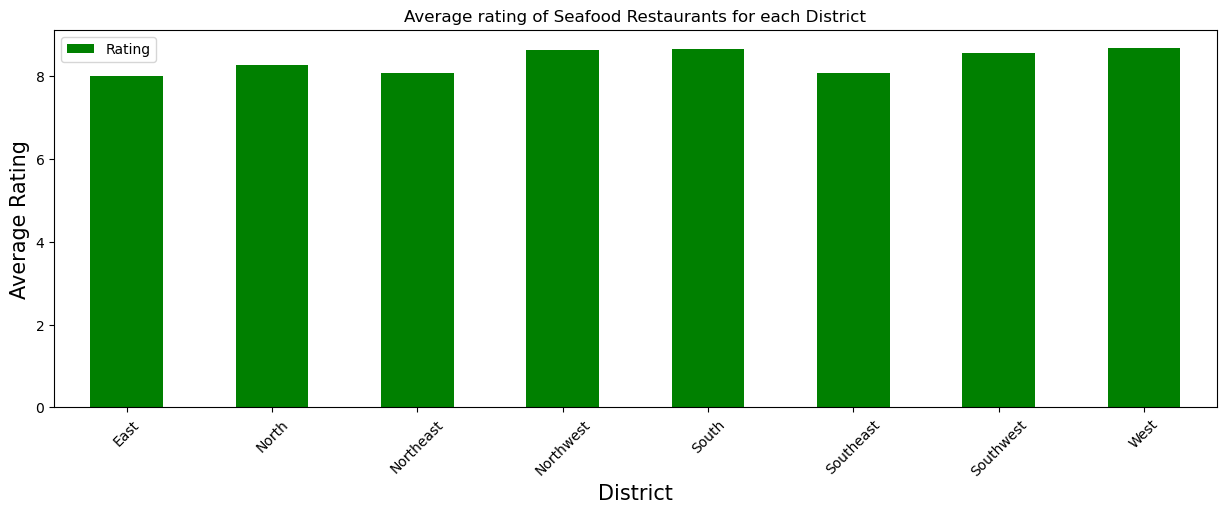

In [41]:
# Visualize district with the average rating of restaurants
plt.figure(figsize=(15,5), dpi = 100)
plt.title('Average rating of Seafood Restaurants for each District')
plt.xlabel('District', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
seafood_rest_stats_hu.groupby('District').mean()['Rating'].plot(kind='bar', color='green', rot=45)
plt.legend()
plt.show()

In [42]:
# Consider all the neighborhoods with average rating greater or equal 8.0
hu_neighborhood_stats=hu_neighborhood_stats[hu_neighborhood_stats['Average Rating']>=8.0].sort_values(['Average Rating'],ascending=False)
print (hu_neighborhood_stats.shape)
hu_neighborhood_stats

(62, 2)


,Neighborhood,Average Rating
21,Fort Bend,8.900000
29,Greenway,8.800000
14,Denver Harbor,8.800000
2,Afton Oaks,8.800000
40,Magnolia Park,8.800000
47,Museum Park,8.800000
28,Greater Uptown,8.800000
48,Neartown,8.800000
66,University Place,8.800000
67,Washington Avenue Coalition,8.800000


In [43]:
# Merge the datasets to add latitude and longitudes values for neighborhoods with average rating greater or equal 8.0
hu_neighborhood_stats = pd.merge(hu_neighborhood_stats, Houston_data, on='Neighborhood')
hu_neighborhood_stats = hu_neighborhood_stats[['District','Neighborhood','Latitude','Longitude','Average Rating']]
hu_neighborhood_stats

,District,Neighborhood,Latitude,Longitude,Average Rating
0,Southwest,Fort Bend,29.569261,-95.814289,8.900000
1,Southwest,Greenway,29.732674,-95.433234,8.800000
2,East,Denver Harbor,29.774383,-95.301140,8.800000
3,West,Afton Oaks,29.736854,-95.453248,8.800000
4,East,Magnolia Park,29.737171,-95.292474,8.800000
5,South,Museum Park,29.725934,-95.383151,8.800000
6,West,Greater Uptown,29.746251,-95.461707,8.800000
7,Southwest,Neartown,29.742668,-95.399189,8.800000
8,Southwest,University Place,29.718548,-95.408949,8.800000
9,West,Washington Avenue Coalition,29.777070,-95.435494,8.800000


In [44]:
hu_district_stats = hu_neighborhood_stats.groupby('District',as_index=False).count()[['District','Neighborhood']]
hu_district_stats.columns=['District','Average Rating>8.0']
hu_district_stats

,District,Average Rating>8.0
0,East,2
1,North,6
2,Northeast,6
3,Northwest,10
4,South,9
5,Southeast,5
6,Southwest,13
7,West,11


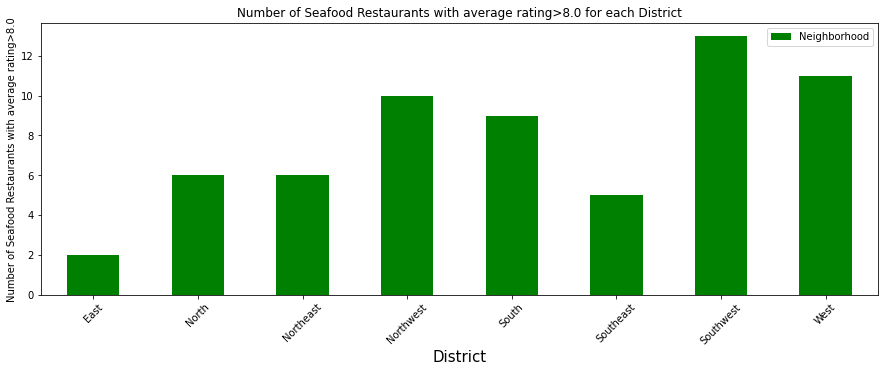

In [45]:
hu_neighborhood_stats.groupby('District')['Neighborhood'].count().plot.bar(figsize=(15,5), color='g', rot=45)

plt.title('Number of Seafood Restaurants with average rating>8.0 for each District')
plt.xlabel('District', fontsize = 15)
plt.ylabel('Number of Seafood Restaurants with average rating>8.0', fontsize=10)

plt.legend()
plt.show()

In [47]:
# create map and display it
hu_map = folium.Map(location=geo_location('Houston, TX'), zoom_start=10)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in hu_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
hu_neighborhood_stats['Label']=hu_neighborhood_stats['Neighborhood']+', '+hu_neighborhood_stats['District']+'('+hu_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in hu_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(hu_map)        
# add ratings to map
hu_map.add_child(rating)

## Step-9 Results and Conclusion

Based on the accuracy of Foursquare data for seafood restaurants in Houston neighborhoods:
1. Houston city has 88 neighborhoods distributed in 8 districts.
2. There are 215 seafood restaurants in 88 neighborhoods with 32 unique restaurant names. The Pappadeaux Seafood Kitchen with 41 branches is the greatest one.
3. Southwest and Southeast districts with 15 and 14 neighborhoods have the maximum number of neighborhoods, respectively.
   Downtown with just 1 neighborhood has the minimum number.
4. Northwest district with 46 seafood restaurants has the maximum number of seafood restaurants and Downtown and Southeast with 0    and 13 seafood restaurants have the minimum numbers.
5. Despite the Southeast district has a maximum number of neighborhoods but it has a minimum number of seafood restaurants.
6. Greater Greenspoint neighborhood in North district with 9 restaurants has the greatest number of seafood restaurants.
7. The overall rating of seafood restaurants in all districts is greater than 8.0 (62 among 215 seafood restaurants).
8. Southwest and East districts with 13 and 2 restaurants have the greatest and lowest number of seafood restaurants.
9. East district with just 2 high-rated restaurants among 14 has just 14% high-rated restaurants.
10. Fort Bend neighborhood with an average rating of 8.9 is the best neighborhood of high-quality seafood restaurants.
11. West district with an average rating of 8.68 is the best district of high-quality seafood restaurants.
12. Eddie V's Prime Seafood branches in the West or Northwest with a 9.1 overall rating are the best locations for Seafood cuisine in Houston. 

So, based on these data-driven insights:
1. I would state that Downtown, Southeast, or East District preferences are the best locations for opening a seafood restaurant in Houston.
2. I would go to one of Eddie V's Prime Seafood restaurants in the West district based on the 9.1 ratings and distance to my home.